In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
#import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [ ]:
data_dir = "/content/drive/MyDrive/Quora-Data/"
train_csv = data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove.csv"
test_csv = data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove.csv"

In [ ]:
df_train = pd.read_csv(train_csv)
df_test = pd.read_csv(test_csv)

In [ ]:
df_train_sample = df_train.sample(frac=0.1)

In [ ]:
X_train = df_train.drop(["question1", "question2", "Y", "q1_orig", "q2_orig", "qid1", "qid2", "id"], axis=1)
Y_train = df_train["Y"]

In [ ]:
X_test = df_test.drop(["question1", "question2", "Y", "q1_orig", "q2_orig", "qid1", "qid2", "id"], axis=1)
Y_test = df_test["Y"]

In [ ]:
X_train_sample = df_train_sample.drop(["question1", "question2", "Y", "q1_orig", "q2_orig", "qid1", "qid2", "id"], axis=1)
Y_train_sample = df_train_sample["Y"]

In [ ]:
df_train_sample.columns

Index(['id', 'qid1', 'qid2', 'q1_orig', 'q2_orig', 'num_word_q1',
       'num_word_q2', 'num_char_q1', 'num_common_words', 'first_word_same',
       ...
       'glv_q2_40', 'glv_q2_41', 'glv_q2_42', 'glv_q2_43', 'glv_q2_44',
       'glv_q2_45', 'glv_q2_46', 'glv_q2_47', 'glv_q2_48', 'glv_q2_49'],
      dtype='object', length=136)

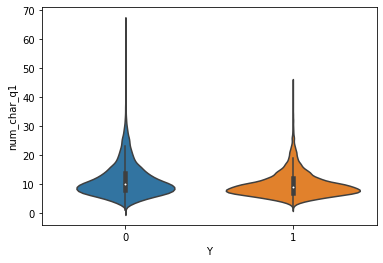

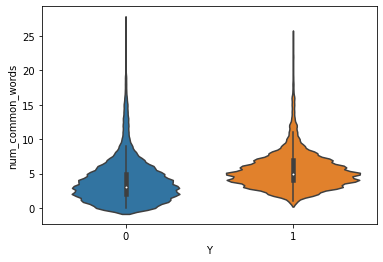

In [ ]:
sns.violinplot(y="num_char_q1", x="Y", data=df_train_sample)
plt.show()
sns.violinplot(y="num_common_words", x="Y", data=df_train_sample)

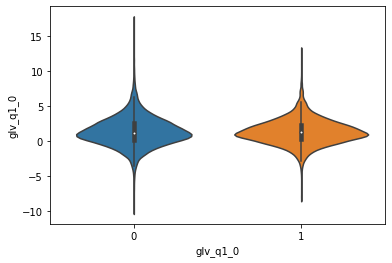

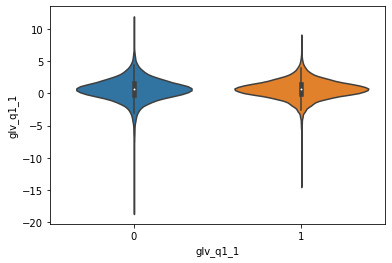

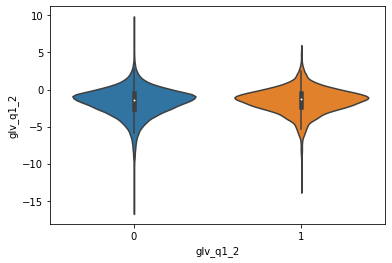

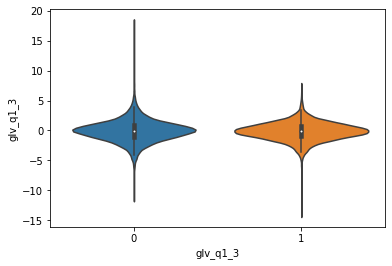

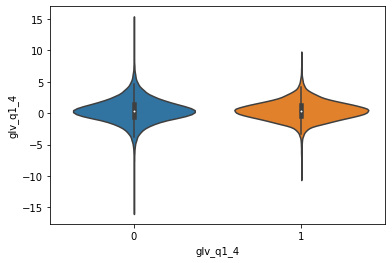

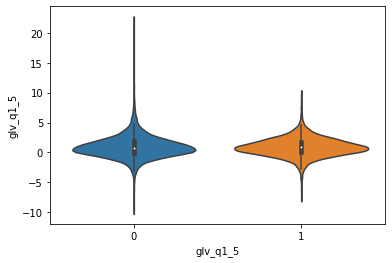

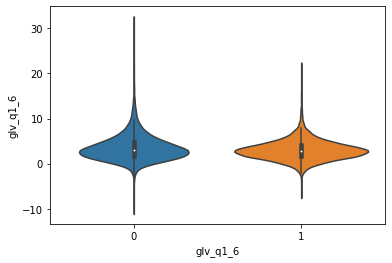

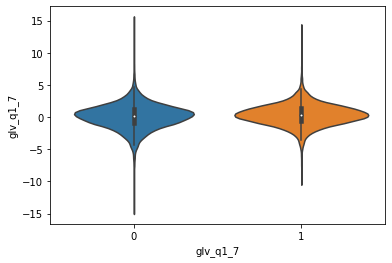

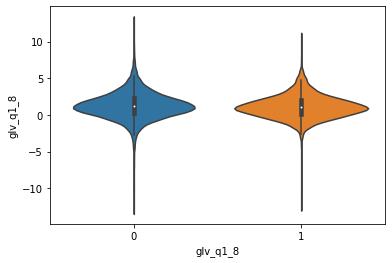

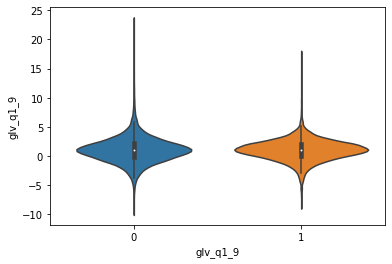

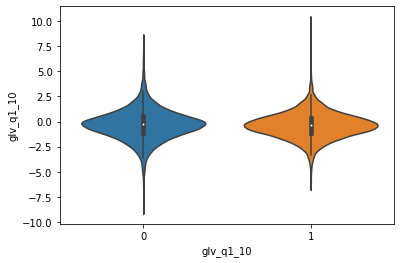

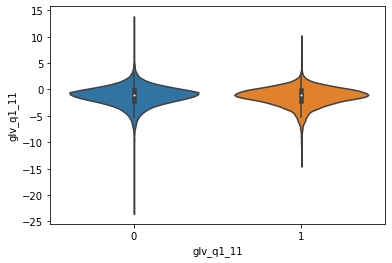

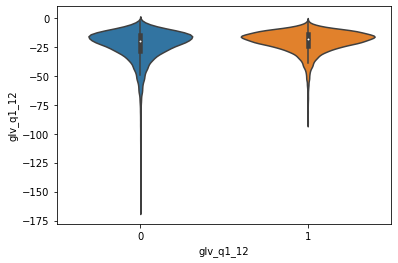

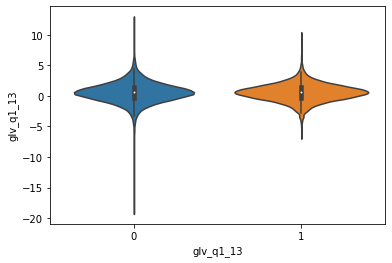

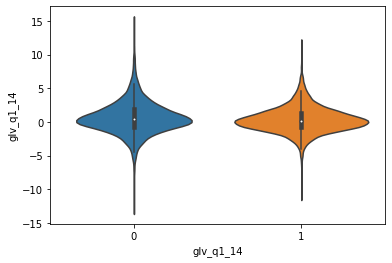

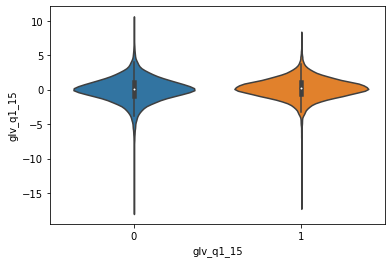

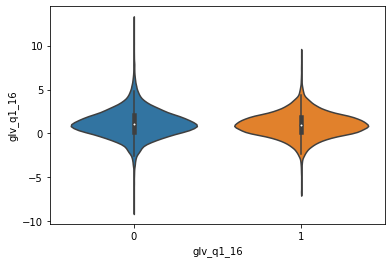

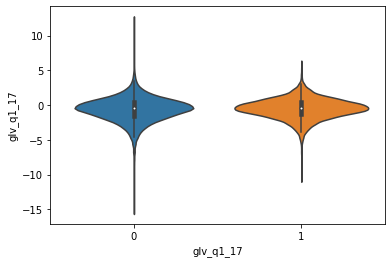

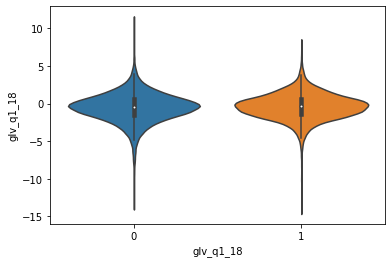

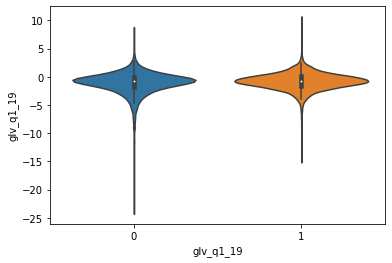

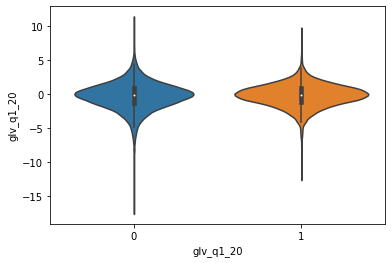

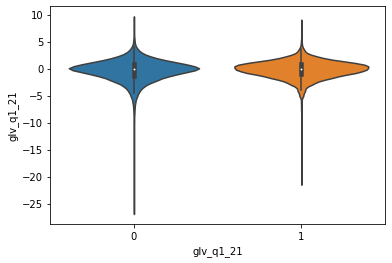

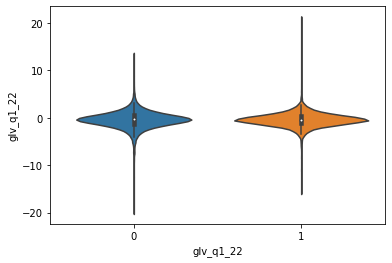

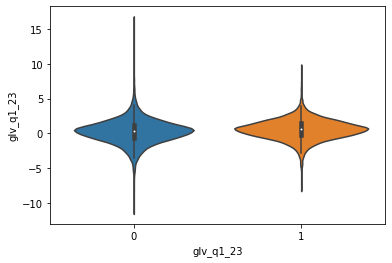

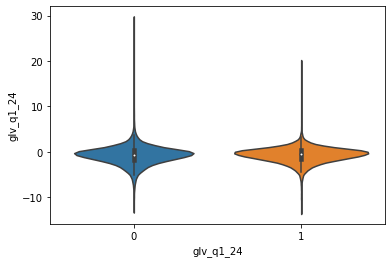

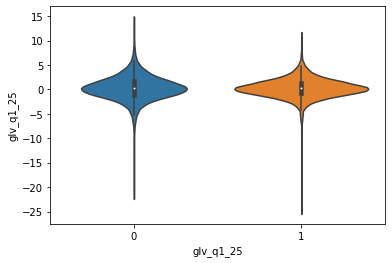

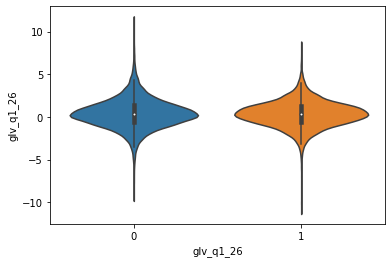

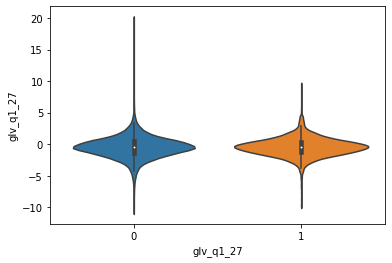

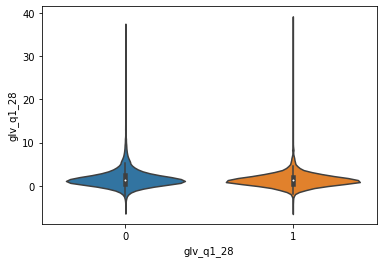

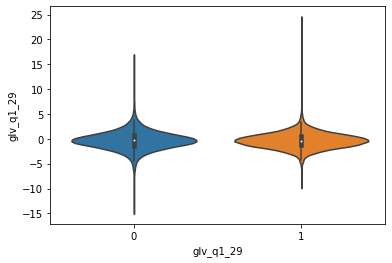

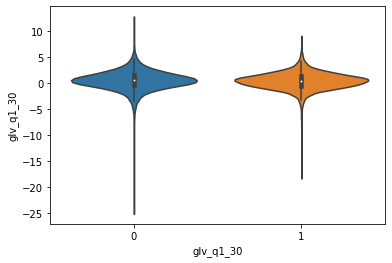

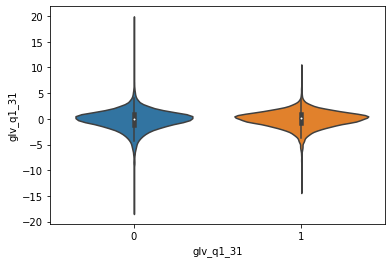

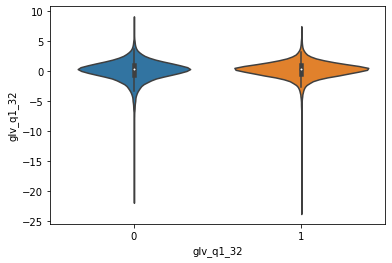

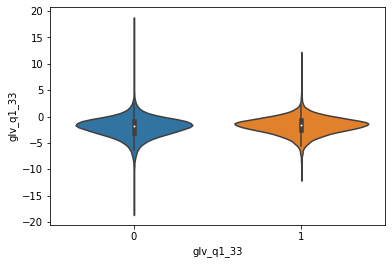

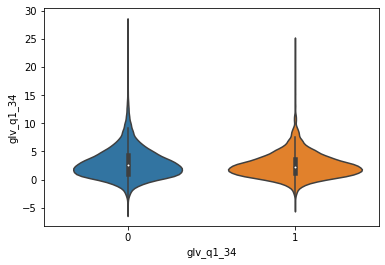

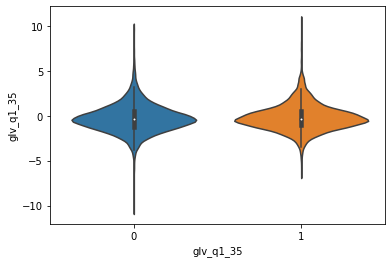

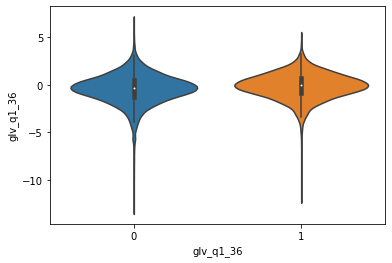

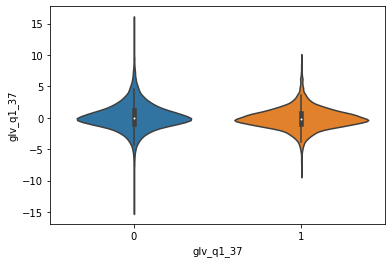

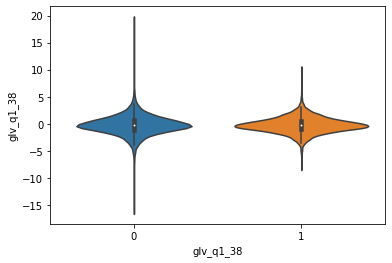

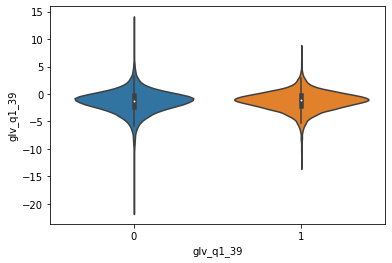

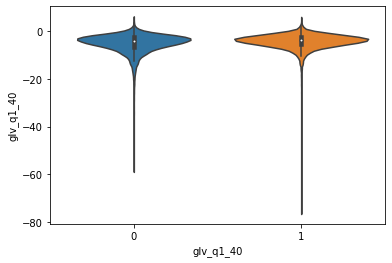

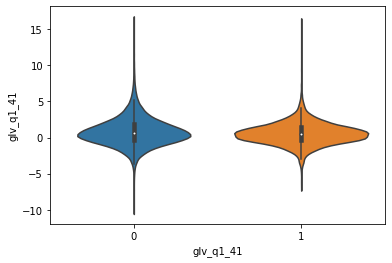

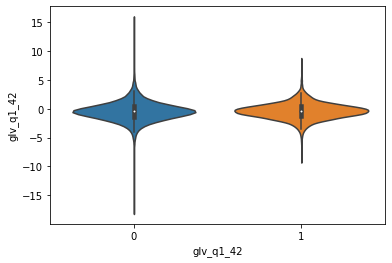

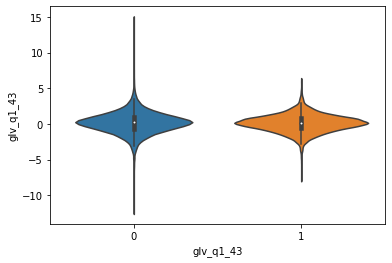

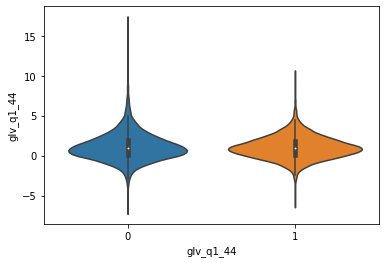

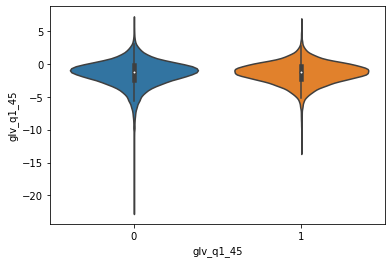

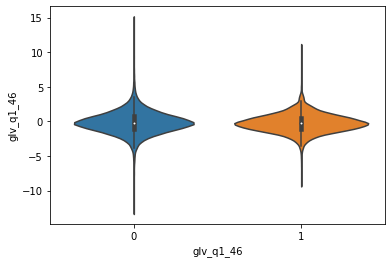

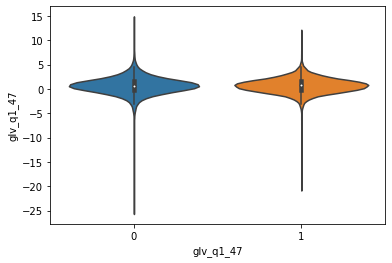

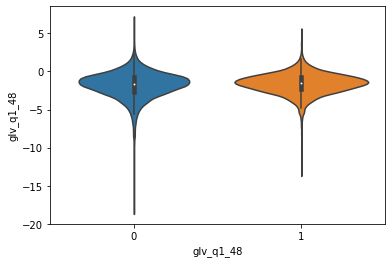

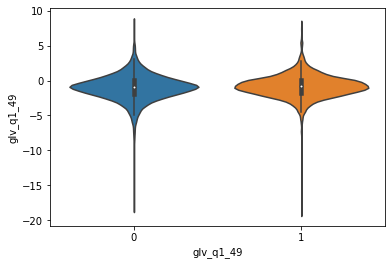

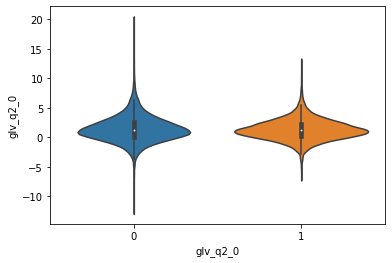

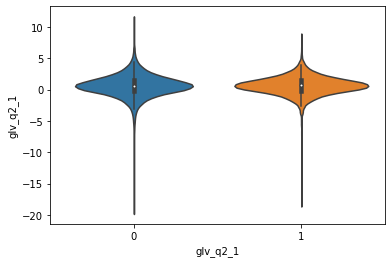

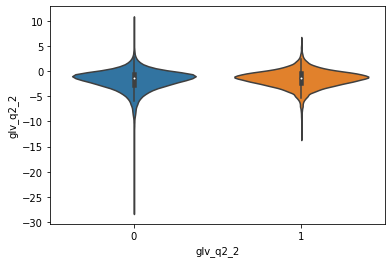

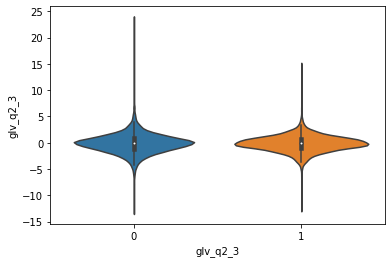

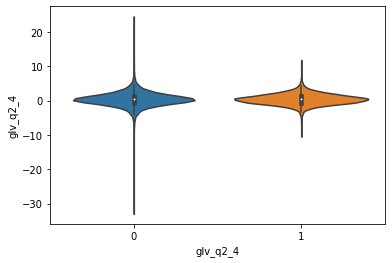

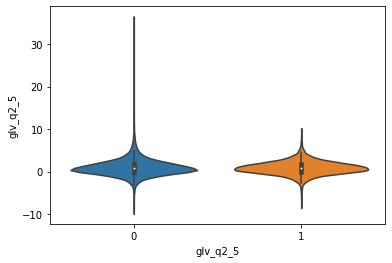

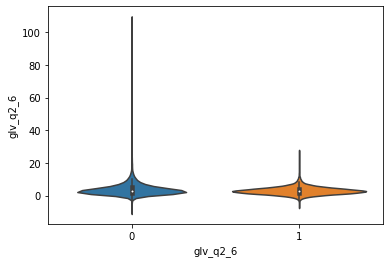

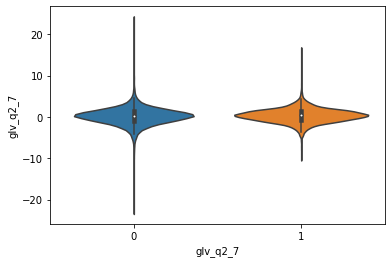

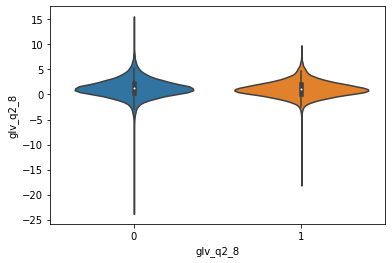

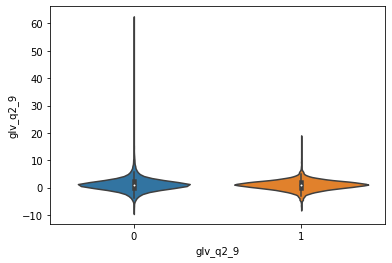

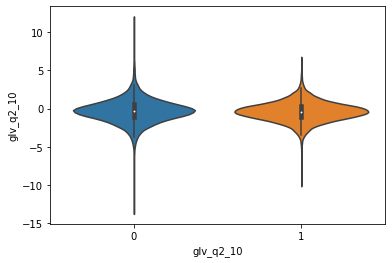

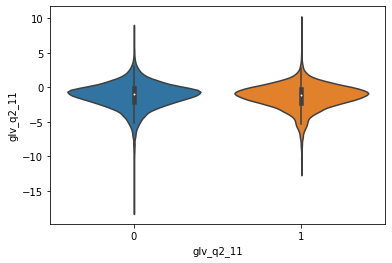

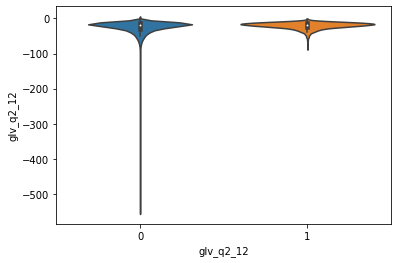

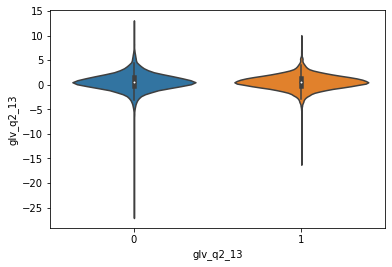

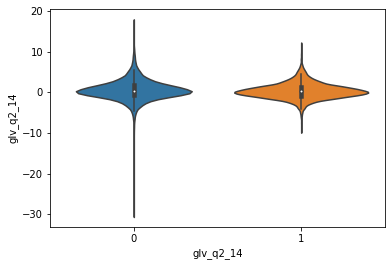

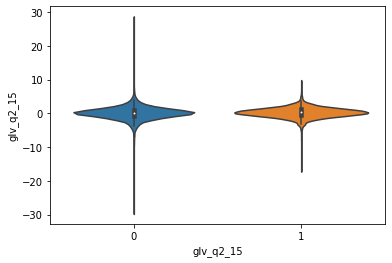

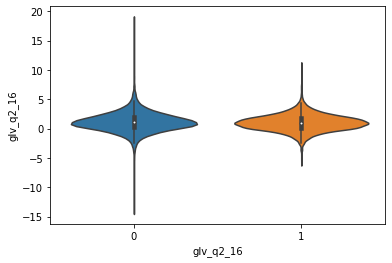

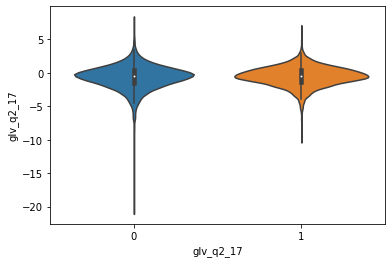

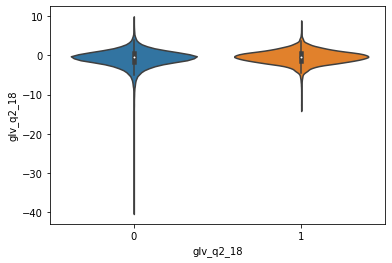

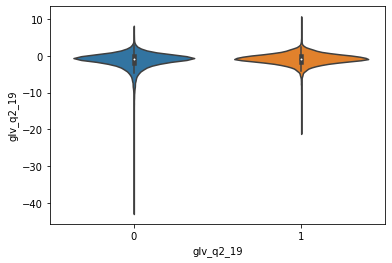

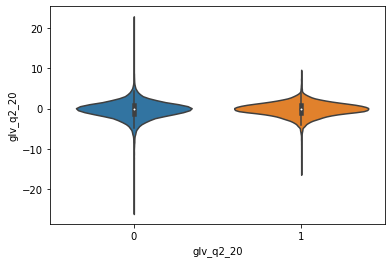

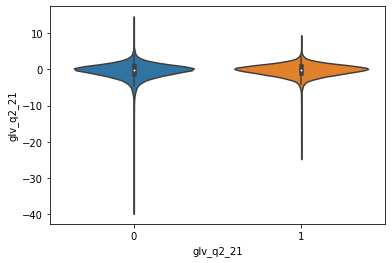

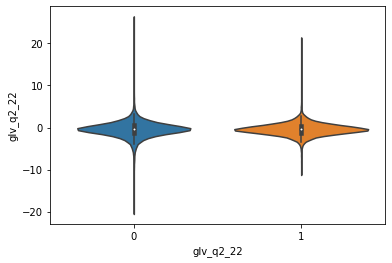

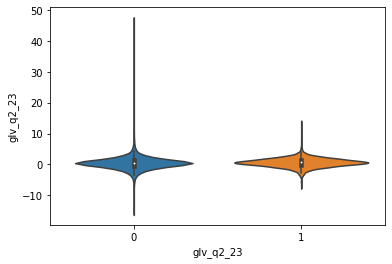

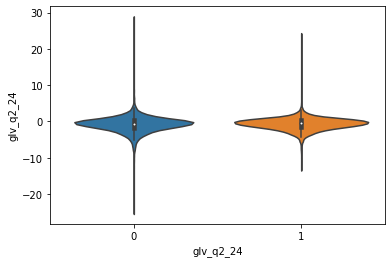

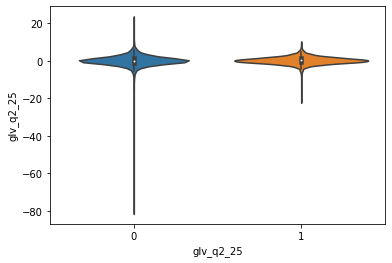

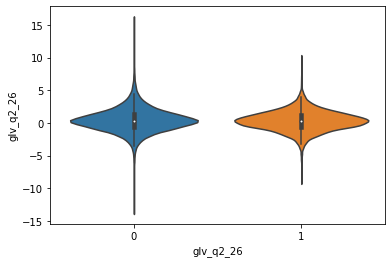

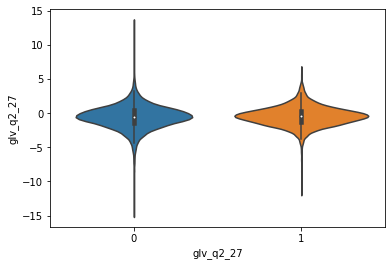

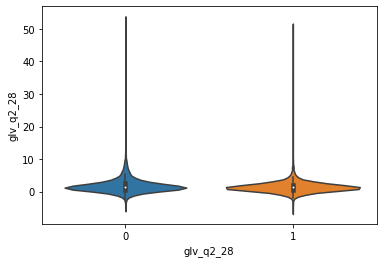

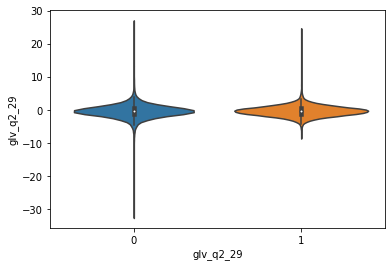

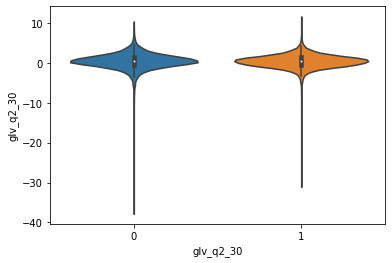

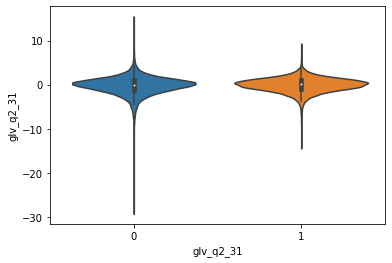

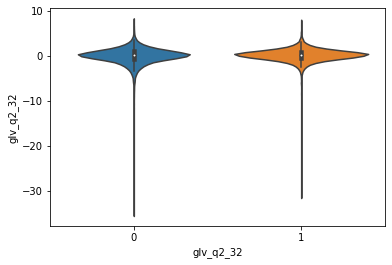

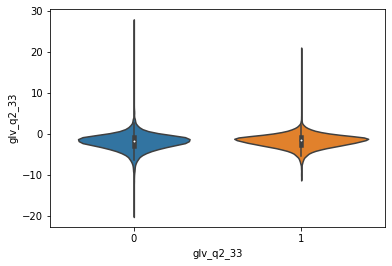

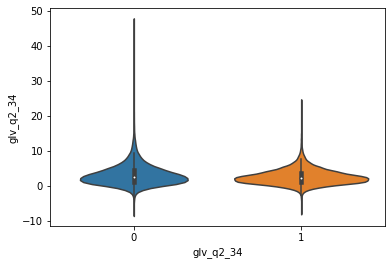

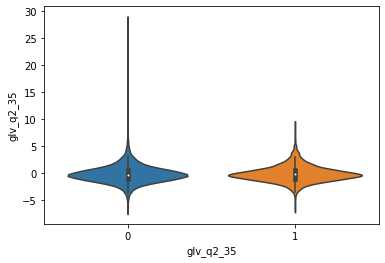

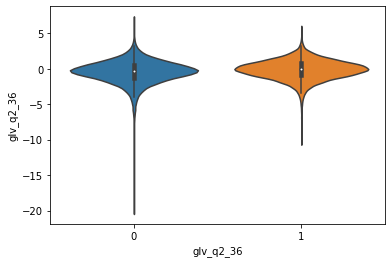

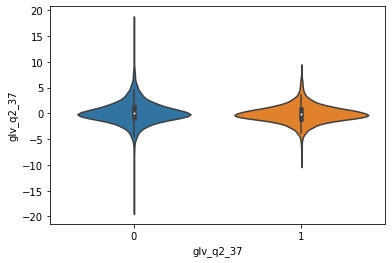

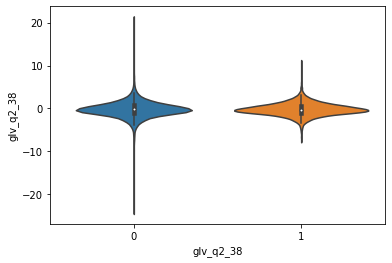

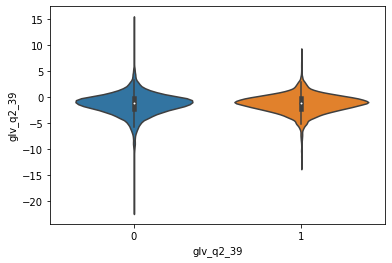

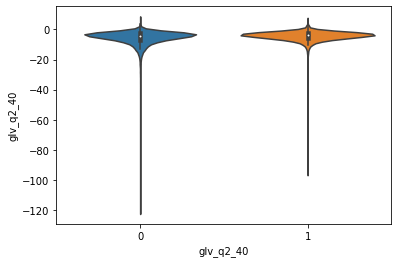

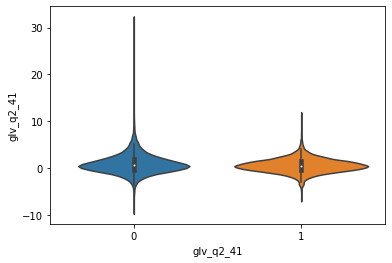

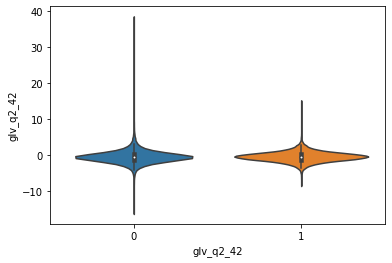

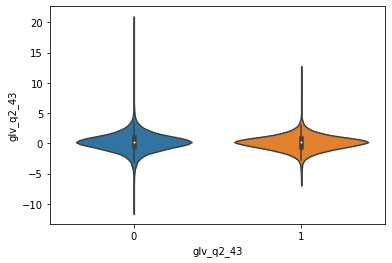

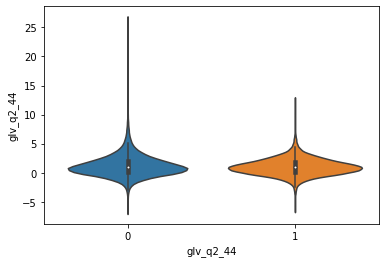

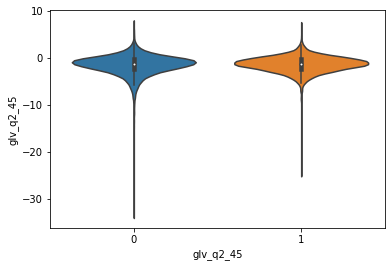

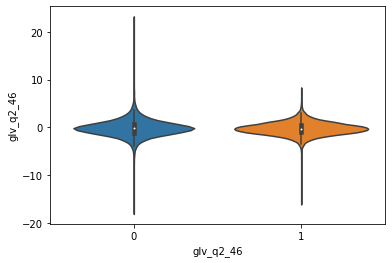

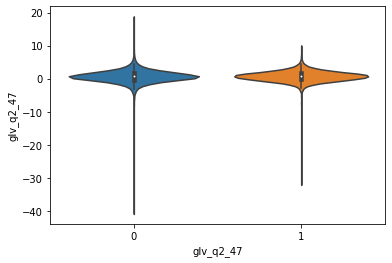

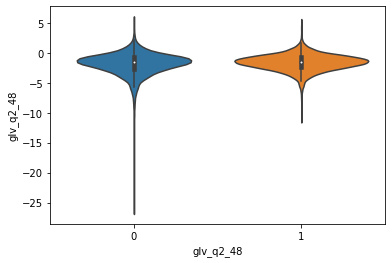

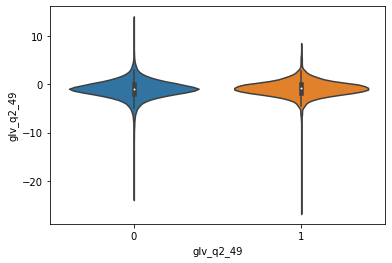

In [ ]:
for col in X_train_sample.columns:
    if not col.startswith("glv_q"):
        continue
    sns.violinplot(y=col, x="Y", data=df_train_sample)
    plt.xlabel(col)
    plt.show()

In [ ]:
str(list(X_train_sample.columns))

"['num_word_q1', 'num_word_q2', 'num_char_q1', 'num_common_words', 'first_word_same', 'last_word_same', 'first_2_same', 'last_2_same', 'common_word_ratio', 'num_sent_diff', 'num_word_diff_ratio', 'num_word_q1_proc', 'num_word_q2_proc', 'num_char_q1_proc', 'num_common_words_proc', 'first_word_same_proc', 'last_word_same_proc', 'first_2_same_proc', 'last_2_same_proc', 'common_word_ratio_proc', 'num_sent_diff_proc', 'num_word_diff_ratio_proc', 'lcs_ratio_max', 'lcs_ratio_min', 'fuzz_rat', 'fuzz_part_rat', 'fuzz_rat_proc', 'fuzz_part_rat_proc', 'glv_q1_0', 'glv_q1_1', 'glv_q1_2', 'glv_q1_3', 'glv_q1_4', 'glv_q1_5', 'glv_q1_6', 'glv_q1_7', 'glv_q1_8', 'glv_q1_9', 'glv_q1_10', 'glv_q1_11', 'glv_q1_12', 'glv_q1_13', 'glv_q1_14', 'glv_q1_15', 'glv_q1_16', 'glv_q1_17', 'glv_q1_18', 'glv_q1_19', 'glv_q1_20', 'glv_q1_21', 'glv_q1_22', 'glv_q1_23', 'glv_q1_24', 'glv_q1_25', 'glv_q1_26', 'glv_q1_27', 'glv_q1_28', 'glv_q1_29', 'glv_q1_30', 'glv_q1_31', 'glv_q1_32', 'glv_q1_33', 'glv_q1_34', 'glv_q1_

In [ ]:
model = PCA(n_components=2)
reduced = pd.DataFrame(model.fit_transform(X_train_sample[['num_word_q1', 'num_word_q2', 'num_char_q1', 'num_common_words', 'first_word_same', 'last_word_same', 'first_2_same', 'last_2_same', 'common_word_ratio', 'num_sent_diff', 'num_word_diff_ratio', 'num_word_q1_proc', 'num_word_q2_proc', 'num_char_q1_proc', 'num_common_words_proc', 'first_word_same_proc', 'last_word_same_proc', 'first_2_same_proc', 'last_2_same_proc', 'common_word_ratio_proc', 'num_sent_diff_proc', 'num_word_diff_ratio_proc', 'lcs_ratio_max', 'lcs_ratio_min', 'fuzz_rat', 'fuzz_part_rat', 'fuzz_rat_proc', 'fuzz_part_rat_proc']]))

In [ ]:
for col in reduced.columns:
    if col.startswith("glv_q"):
        continue
    sns.violinplot(y=col, x="Y", data=df_train_sample)
    plt.xlabel(col)
    plt.show()

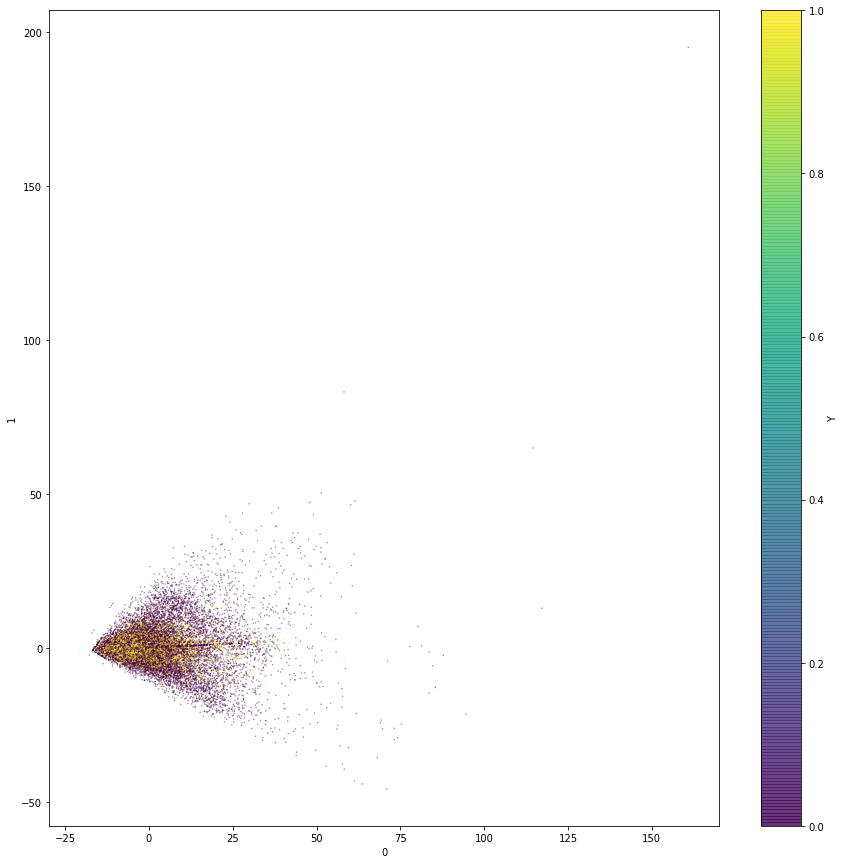

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
reduced.join(Y_train_sample.reset_index(drop=True)).plot.scatter(x=0, y=1, c="Y", s=0.1, colormap='viridis', alpha=0.8, ax=ax)

In [ ]:
reduced.join(Y_train)

,0,1,Y
0,-6.109049,8.832194,0
1,10.816885,17.291716,1
2,-13.272804,2.724390,1
3,-4.922249,-2.114157,1
4,22.341877,1.182508,0
...,...,...,...
323427,-10.571413,7.371764,0
323428,14.199012,-5.040680,1
323429,3.651955,8.151584,1
323430,13.699348,-3.846542,0


In [ ]:
reduced = pd.DataFrame(reduced, columns="X Y".split())

labels = reduced.hvplot.labels(x="X", y="Y", text="Word", text_baseline="top")

points = reduced.hvplot.scatter(x="X", y="Y", color=Plot.blue, padding=0.5)

plot = (points * labels).opts(
    title="PCA",
    width=Plot.width,
    height=Plot.height,
    fontscale=Plot.fontscale,
)

outcome = Embed(plot=plot, file_name="sklearn_pca_words")()

print(outcome)

In [ ]:
x = X_train.loc[100,:]
np.linalg.norm(x[["glv_q1_" + str(i) for i in range(50)]].values - x[["glv_q2_" + str(i) for i in range(50)]].values, ord=2)
x[["glv_q1_" + str(i) for i in range(50)]].values == x[["glv_q2_" + str(i) for i in range(50)]].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
X_train_sample["num_word_q1_proc"]

302964     4
239320     4
38630      4
217840     7
83711      3
          ..
11800     10
161880     4
295409    10
236883     7
138535     7
Name: num_word_q1_proc, Length: 32343, dtype: int64

In [ ]:
def cos_glove_avg(x):
    a = x[["glv_q1_" + str(i) for i in range(50)]].values/(x["num_word_q1_proc"] + 1)
    b = x[["glv_q2_" + str(i) for i in range(50)]].values/(x["num_word_q2_proc"] + 1)
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def cos_glove(x):
    a = x[["glv_q1_" + str(i) for i in range(50)]].values
    b = x[["glv_q2_" + str(i) for i in range(50)]].values
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def transformer(X):
    X = X.copy()
    X["glove_dist_l2"] = X.apply(
        lambda x: np.linalg.norm(x[["glv_q1_" + str(i) for i in range(50)]].values - x[["glv_q2_" + str(i) for i in range(50)]].values, ord=2), axis=1
    )
    X["glove_dist_l1"] = X.apply(
        lambda x: np.linalg.norm(x[["glv_q1_" + str(i) for i in range(50)]].values - x[["glv_q2_" + str(i) for i in range(50)]].values, ord=1), axis=1
    )
    X["glove_dist_l2_avg"] = X.apply(
        lambda x: np.linalg.norm(x[["glv_q1_" + str(i) for i in range(50)]].values/(x["num_word_q1_proc"] + 1) - x[["glv_q2_" + str(i) for i in range(50)]].values/(x["num_word_q2_proc"] + 1), ord=2), axis=1
    )
    X["glove_dist_l1_avg"] = X.apply(
        lambda x: np.linalg.norm(x[["glv_q1_" + str(i) for i in range(50)]].values/(x["num_word_q1_proc"] + 1) - x[["glv_q2_" + str(i) for i in range(50)]].values/(x["num_word_q2_proc"] + 1), ord=1), axis=1
    )
    X["glove_cosine"] = X.apply(
        cos_glove, axis=1
    )
    X["glove_cosine_avg"] = X.apply(
        cos_glove_avg, axis=1
    )

    

    return X # /(x["num_word_q1_proc"]) /(x["num_word_q2_proc"])

In [ ]:
X_train_sample.join(pd.DataFrame(PCA(n_components=2).fit_transform(X_train_sample[["glv_q1_" + str(i) for i in range(50)]])))

,num_word_q1,num_word_q2,num_char_q1,num_common_words,first_word_same,last_word_same,first_2_same,last_2_same,common_word_ratio,num_sent_diff,num_word_diff_ratio,num_word_q1_proc,num_word_q2_proc,num_char_q1_proc,num_common_words_proc,first_word_same_proc,last_word_same_proc,first_2_same_proc,last_2_same_proc,common_word_ratio_proc,num_sent_diff_proc,num_word_diff_ratio_proc,lcs_ratio_max,lcs_ratio_min,fuzz_rat,fuzz_part_rat,fuzz_rat_proc,fuzz_part_rat_proc,glv_q1_0,glv_q1_1,glv_q1_2,glv_q1_3,glv_q1_4,glv_q1_5,glv_q1_6,glv_q1_7,glv_q1_8,glv_q1_9,glv_q1_10,glv_q1_11,...,glv_q2_12,glv_q2_13,glv_q2_14,glv_q2_15,glv_q2_16,glv_q2_17,glv_q2_18,glv_q2_19,glv_q2_20,glv_q2_21,glv_q2_22,glv_q2_23,glv_q2_24,glv_q2_25,glv_q2_26,glv_q2_27,glv_q2_28,glv_q2_29,glv_q2_30,glv_q2_31,glv_q2_32,glv_q2_33,glv_q2_34,glv_q2_35,glv_q2_36,glv_q2_37,glv_q2_38,glv_q2_39,glv_q2_40,glv_q2_41,glv_q2_42,glv_q2_43,glv_q2_44,glv_q2_45,glv_q2_46,glv_q2_47,glv_q2_48,glv_q2_49,0,1
302964,8,7,8,5,1,0,1.0,0.0,0.312500,0.0,0.062500,4,4,4,3,1,1,0.5,0.5,0.312500,0.0,0.062500,0.323529,0.333333,0.74,0.73,0.67,0.62,3.960580,0.719634,-0.060830,0.245357,2.723630,2.355247,1.567620,-1.130530,0.663669,0.014595,-0.991479,-2.433780,...,-10.039400,2.214770,0.373710,-0.864431,1.583140,1.047900,-1.326280,1.117025,-0.742270,0.695017,-0.296936,0.880900,-2.399190,1.029030,1.852428,0.564965,1.520391,0.067105,1.050467,-2.315830,1.951130,-2.893470,0.757220,-0.825265,-0.644960,1.198520,2.264390,-2.737060,0.422100,0.707380,0.212302,-0.673099,0.689065,-0.653890,-0.217731,1.460207,-2.074100,-2.824250,NaN,NaN
239320,7,5,7,4,1,0,1.0,0.0,0.307692,0.0,0.153846,4,3,4,3,1,1,1.0,0.5,0.307692,0.0,0.153846,0.520000,0.866667,0.79,0.96,0.72,0.93,2.231145,0.665298,-0.432340,-1.025385,1.068374,0.105505,2.962380,0.797810,1.125431,0.495730,-0.512119,-1.239760,...,-10.821501,0.120390,0.124362,0.960299,0.498464,-0.117410,0.058960,-0.823530,0.637010,0.667045,0.247309,0.698726,-0.696250,-0.082130,0.527350,0.249130,1.024520,-0.498664,1.664934,-1.081540,0.334580,-0.699632,1.190590,-0.314830,-0.667870,-0.288270,-0.642370,-0.515285,-2.963630,0.414340,0.133140,-0.409140,0.197353,-1.492720,-0.154963,0.888970,-0.815523,-0.881370,NaN,NaN
38630,7,12,7,2,0,1,0.0,0.5,0.100000,0.0,0.250000,4,6,4,3,0,1,0.0,1.0,0.100000,0.0,0.250000,0.235294,0.421053,0.50,0.53,0.58,0.56,0.704704,0.061020,-2.057953,0.343215,0.338880,1.324727,3.670460,2.017000,1.097040,2.786460,-0.451977,-0.401401,...,-24.724499,1.421134,-1.961262,0.618449,0.418031,0.267780,-2.549610,-0.884812,1.411604,-1.099605,-2.250161,2.036550,-0.321980,-0.450518,-0.159919,-0.684052,1.845347,0.095718,-0.282187,-2.357500,-1.550230,-0.116313,2.658975,-1.659720,-0.641620,-2.072570,0.052502,-0.336849,-4.642030,0.294952,0.597487,0.265604,0.172893,0.622086,0.951383,1.347099,-1.616856,0.530390,NaN,NaN
217840,15,37,15,3,0,0,0.0,0.0,0.056604,0.4,0.415094,7,18,7,2,0,1,0.0,0.5,0.056604,0.4,0.415094,0.100000,0.250000,0.28,0.40,0.32,0.44,-0.722017,0.188315,-0.364380,0.478555,-3.984560,-1.391514,6.275510,2.016161,1.170473,2.750706,-0.887965,-0.349447,...,-71.563606,-3.850990,-7.147114,3.134520,-5.569030,-6.822993,-6.664083,-6.314670,5.421891,1.600663,-0.309895,4.897947,-2.693224,4.049998,0.678685,-6.021910,-0.882596,-2.949146,-7.808496,1.123012,-3.172781,1.224298,0.617951,3.691034,0.639255,1.154106,-2.835036,-0.494759,-11.978839,6.432500,4.820016,-1.396645,5.752135,-7.783507,2.665545,0.724034,-3.637438,-1.038457,NaN,NaN
83711,4,4,4,0,0,0,0.0,0.0,0.000000,0.0,0.000000,3,3,3,3,0,1,1.0,0.5,0.000000,0.0,0.000000,0.555556,0.526316,0.56,0.60,0.61,0.76,-1.155260,-0.721130,-0.445514,0.292355,-0.457800,-0.133213,0.525210,-1.363240,1.106680,1.419850,0.419290,0.504260,...,-6.687110,0.399418,0.546738,-0.410971,0.357442,-0.179309,0.087776,-0.222450,-1.706220,-0.156985,2.067560,0.163711,-1.552810,-0.720362,-1.194844,0.009400,-0.830370,1.114760,-0.571986,-0.457210,1.378810,-3.571800,2.134050,-1.217580,0.509450,0.716200,-1.457350,-0.716150,-2.652160,1.654960,0.116310,0.374830,-1.759695,-1.499080,-1.

In [ ]:
#X_train_transform = transformer(X_train)
X_test_transform = transformer(X_test)

In [ ]:
# df_train_transform = X_train_transform.copy()
# df_train_transform["Y"] = Y_train

df_test_transform = X_test_transform.copy()
df_test_transform["Y"] = Y_test

In [ ]:
df_test_transform.to_csv(data_dir + "pre-processing/test_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv", index=False)
#df_train_transform.to_csv(data_dir + "pre-processing/train_EDA1_preprocessing_with_lemma_EDA2_glove_EDA3.csv", index=False)

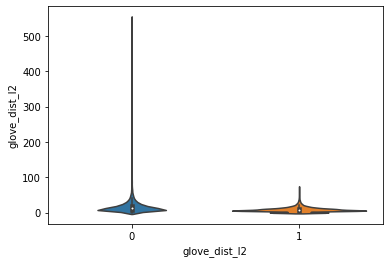

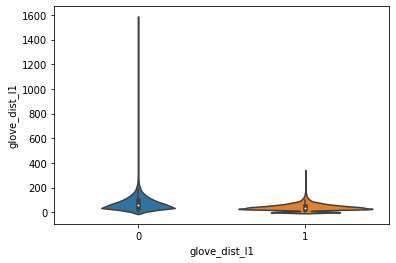

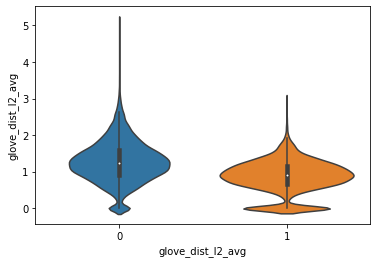

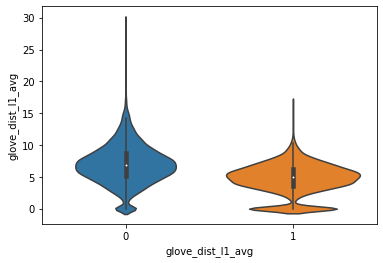

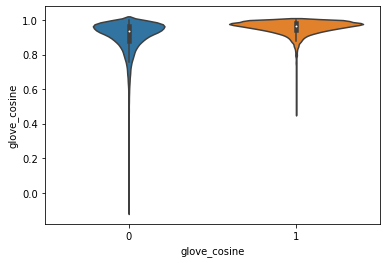

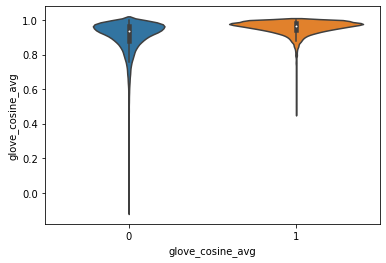

In [ ]:
for col in X_train_sample_transform:
    if not col.startswith("glove"):
        continue
    sns.violinplot(y=col, x="Y", data=X_train_sample_transform.join(Y_train_sample))
    plt.xlabel(col)
    plt.show()

302964     3.440606
239320     5.810170
38630     13.062142
217840    49.453553
83711      0.000000
            ...    
11800     51.162842
161880     7.768298
295409     4.390445
236883    10.935106
138535     5.547306
Name: glove_dist_euc, Length: 32343, dtype: float64

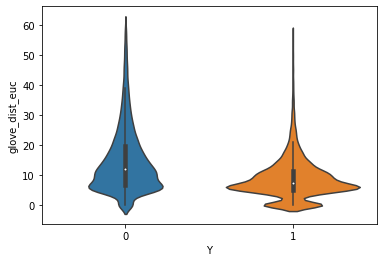

In [ ]:
sns.violinplot(x="Y", y="glove_dist_euc", data=X_train_sample_transform.join(Y_train)[X_train_sample_transform["glove_dist_euc"] < 60])
X_train_sample_transform["glove_dist_euc"]

In [ ]:
dist_temp = X_train_transform["glove_dist_euc"]

In [ ]:
dist_temp = dist_temp/max(dist_temp)

In [ ]:
for col

0         0.043194
1         0.005449
2         0.009548
3         0.009317
4         0.035351
            ...   
323427    0.007456
323428    0.027997
323429    0.034488
323430    0.015270
323431    0.008443
Name: glove_dist_euc, Length: 323432, dtype: float64

In [ ]:
# sns.violinplot(
#     data=dist_temp
# )
# plt.show()
sns.violinplot(
    data = [
        dist_temp[Y_train == 0 and dist_temp < 0.5],
        dist_temp[Y_train == 1]
    ]
)
plt.show()

NameError: ignored

In [ ]:
X_train.loc[1][["glv_q1_" + str(i) for i in range(50)]].values.dot(X_train.loc[1][["glv_q2_" + str(i) for i in range(50)]].values)

938.0675033776488

In [ ]:
for idx, row in abs(X_train_sample_transform.join(Y_train_sample).corr()["Y"]).sort_values(ascending=False).iteritems():
    print(idx, row)

Y 1.0
fuzz_rat_proc 0.4138598137224493
fuzz_rat 0.38690792356500964
fuzz_part_rat_proc 0.38632798273949864
common_word_ratio 0.3823260903614826
common_word_ratio_proc 0.3823260903614824
fuzz_part_rat 0.36615858516091615
glove_dist_l1_avg 0.35935514399835244
lcs_ratio_max 0.3574743278124894
glove_dist_l2_avg 0.35016033555249665
lcs_ratio_min 0.34061646891747105
glove_dist_l1 0.32003930285846766
glove_cosine 0.315350853294714
glove_cosine_avg 0.31535085329471385
last_word_same 0.3084289381081936
last_2_same_proc 0.30616034096848443
last_2_same 0.29794089585914985
glove_dist_l2 0.2722906448078544
first_2_same_proc 0.2600282082434177
num_common_words 0.2298414196498021
num_common_words_proc 0.2289923356259145
first_word_same 0.19204230975846107
num_word_diff_ratio_proc 0.1900426632195418
num_word_diff_ratio 0.1900426632195418
first_word_same_proc 0.18737325520551495
first_2_same 0.1812903694189306
num_word_q2_proc 0.17587653141754736
num_char_q1_proc 0.17510490523984973
num_word_q1_proc 0.